In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

In [52]:
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [54]:
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


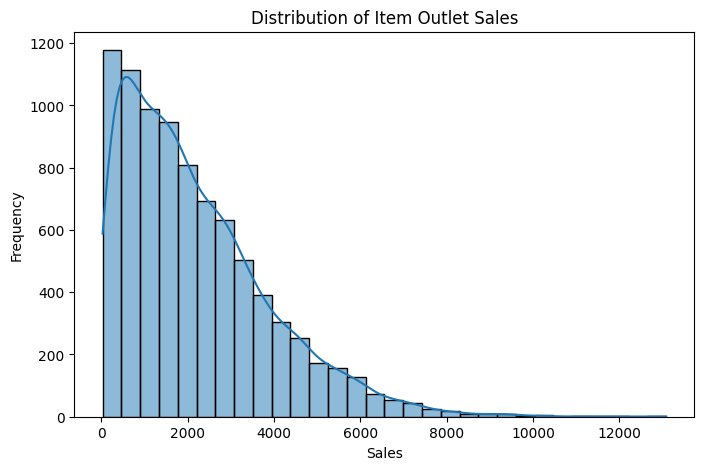

In [55]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


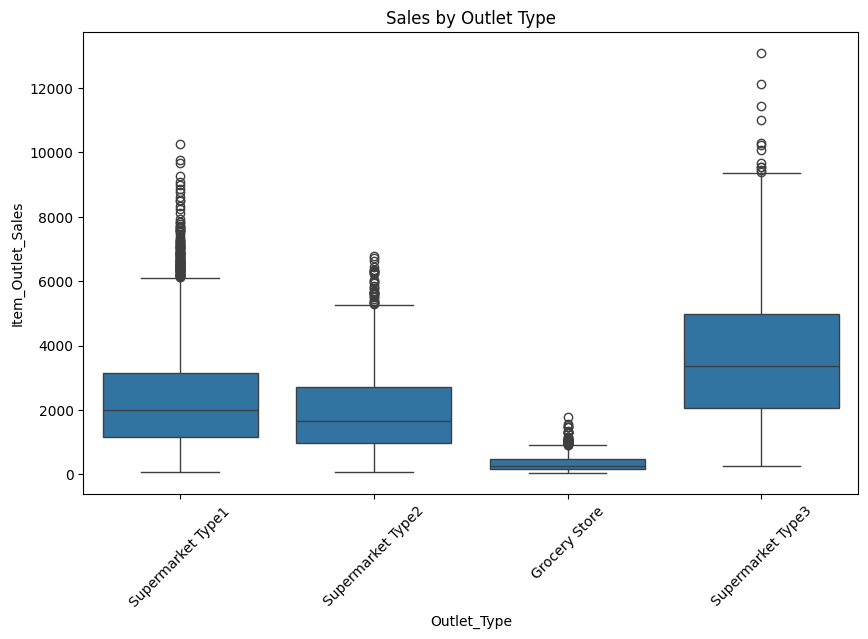

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()


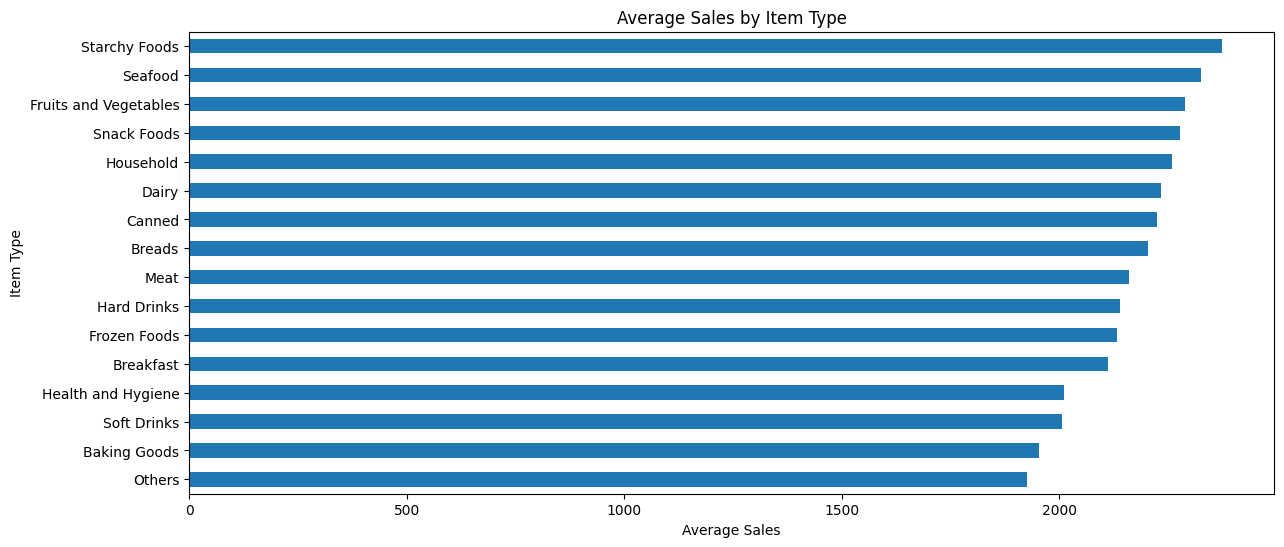

In [57]:
plt.figure(figsize=(14, 6))
sales_by_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
sales_by_item.plot(kind='barh')
plt.title('Average Sales by Item Type')
plt.xlabel('Average Sales')
plt.ylabel('Item Type')
plt.show()


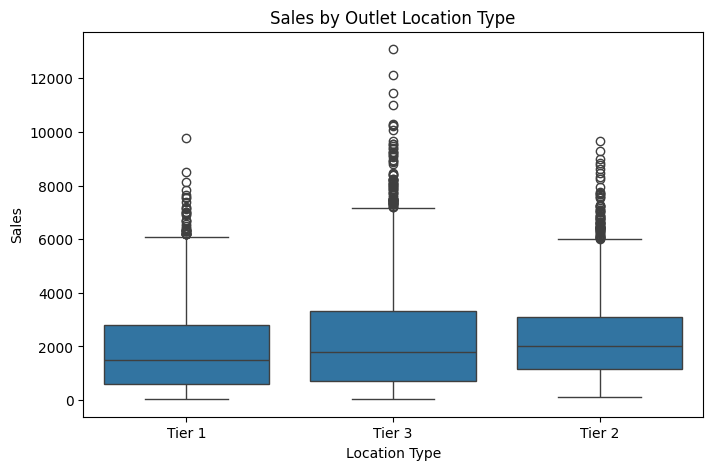

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Location Type')
plt.xlabel('Location Type')
plt.ylabel('Sales')
plt.show()


In [9]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [10]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [11]:
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [12]:
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])


In [13]:
print(df)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 1         0.016047   
1              DRC01        5.920                 2         0.019278   
2              FDN15       17.500                 1         0.016760   
3              FDX07       19.200                 2         0.000000   
4              NCD19        8.930                 1         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 1         0.056783   
8519           FDS36        8.380                 2         0.046982   
8520           NCJ29       10.600                 1         0.035186   
8521           FDN46        7.210                 2         0.145221   
8522           DRG01       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
0             4  249.8092                  9            1   
1            

In [14]:
X = df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y = df['Item_Outlet_Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [19]:
print(rmse)

1224.5420415401434


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=500, random_state=25 )

In [22]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=25)

In [23]:
y_pred_rf = rf.predict(X_test)

In [24]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))

In [25]:
print(rmse_rf)

1132.5703570674445


In [26]:
testDataFrame_original =  pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")

In [27]:
testDataFrame = testDataFrame_original.copy(deep=True)

In [28]:
print(testDataFrame.isna().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [29]:
testDataFrame['Item_Weight'] = testDataFrame['Item_Weight'].fillna(testDataFrame['Item_Weight'].mean())
testDataFrame['Outlet_Size'] = testDataFrame['Outlet_Size'].fillna(testDataFrame['Outlet_Size'].mode()[0])

In [30]:
testDataFrame['Outlet_Age'] = 2013 - testDataFrame['Outlet_Establishment_Year']
testDataFrame.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [31]:
testDataFrame['Item_Fat_Content'] = le.fit_transform(testDataFrame['Item_Fat_Content'])
testDataFrame['Item_Type'] = le.fit_transform(testDataFrame['Item_Type'])
testDataFrame['Outlet_Identifier'] = le.fit_transform(testDataFrame['Outlet_Identifier'])
testDataFrame['Outlet_Size'] = le.fit_transform(testDataFrame['Outlet_Size'])
testDataFrame['Outlet_Location_Type'] = le.fit_transform(testDataFrame['Outlet_Location_Type'])
testDataFrame['Outlet_Type'] = le.fit_transform(testDataFrame['Outlet_Type'])

In [32]:
X_testDataFrame = testDataFrame.drop(['Item_Identifier'],axis=1)
# y_testDataFrame = testDataFrame['Item_Outlet_Sales']

In [33]:
y_pred_on_X_testDataFrame = rf.predict(X_testDataFrame)

In [34]:
FinalSubmission = pd.DataFrame({'Item_Identifier':testDataFrame_original['Item_Identifier'],'Outlet_Identifier':testDataFrame_original['Outlet_Identifier'],'Item_Outlet_Sales':y_pred_on_X_testDataFrame})

In [35]:
print(FinalSubmission)

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049        1828.525156
1              FDW14            OUT017        1145.056156
2              NCN55            OUT010         629.986618
3              FDQ58            OUT017        2252.791559
4              FDY38            OUT027        6043.684982
...              ...               ...                ...
5676           FDB58            OUT046        2509.416179
5677           FDD47            OUT018        2539.832586
5678           NCO17            OUT045        1833.550615
5679           FDJ26            OUT017        3996.471158
5680           FDU37            OUT045        1501.094038

[5681 rows x 3 columns]


In [ ]:
FinalSubmission.to_csv('My Drive/Colab Notebooks/finalSubmission_v1.csv',index=False)

In [43]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Load data
# df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

# # Data preprocessing
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
# df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
# df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# le = LabelEncoder()
# df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
# df['Item_Type'] = le.fit_transform(df['Item_Type'])
# df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
# df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
# df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
# df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

# # Feature-target split
# X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
# y = df['Item_Outlet_Sales']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# # Neural Network Model
# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1))  # Output layer for regression

# model.compile(optimizer='adam', loss='mse')

# # Early stopping to prevent overfitting
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# # Training
# model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# # Prediction and Evaluation
# y_pred_nn = model.predict(X_test).flatten()
# rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
# print("Neural Network RMSE:", rmse_nn)

# # Preprocess test data
# testDataFrame_original = pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")
# testDataFrame = testDataFrame_original.copy(deep=True)

# testDataFrame['Item_Weight'] = testDataFrame['Item_Weight'].fillna(testDataFrame['Item_Weight'].mean())
# testDataFrame['Outlet_Size'] = testDataFrame['Outlet_Size'].fillna(testDataFrame['Outlet_Size'].mode()[0])
# testDataFrame['Outlet_Age'] = 2013 - testDataFrame['Outlet_Establishment_Year']
# testDataFrame.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# testDataFrame['Item_Fat_Content'] = le.fit_transform(testDataFrame['Item_Fat_Content'])
# testDataFrame['Item_Type'] = le.fit_transform(testDataFrame['Item_Type'])
# testDataFrame['Outlet_Identifier'] = le.fit_transform(testDataFrame['Outlet_Identifier'])
# testDataFrame['Outlet_Size'] = le.fit_transform(testDataFrame['Outlet_Size'])
# testDataFrame['Outlet_Location_Type'] = le.fit_transform(testDataFrame['Outlet_Location_Type'])
# testDataFrame['Outlet_Type'] = le.fit_transform(testDataFrame['Outlet_Type'])

# X_testDataFrame = testDataFrame.drop(['Item_Identifier'], axis=1)

# # Predicting with neural network
# y_pred_final_nn = model.predict(X_testDataFrame).flatten()

# y_pred_final_nn = np.clip(y_pred_final_nn, 0, None)

# FinalSubmission = pd.DataFrame({
#     'Item_Identifier': testDataFrame_original['Item_Identifier'],
#     'Outlet_Identifier': testDataFrame_original['Outlet_Identifier'],
#     'Item_Outlet_Sales': y_pred_final_nn
# })

# print(FinalSubmission)

# FinalSubmission.to_csv('My Drive/Colab Notebooks/finalSubmission_nn_v2.csv', index=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6079244.0000 - val_loss: 1864676.3750
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1912793.0000 - val_loss: 1855938.5000
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2010220.5000 - val_loss: 1842860.6250
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1864253.2500 - val_loss: 1862169.5000
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1877674.2500 - val_loss: 1764575.8750
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1852751.3750 - val_loss: 1708046.6250
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1856626.2500 - val_loss: 1662010.5000
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1783287.0000 - val_loss: 1619303.7500
Epoch 9/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1716017.7500 - val_loss: 1584134.6250
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1678566.0000 - val_loss: 1535798.3750
Epoch 11/

In [48]:
#########################Output of Following code has been submitted Finally#########################

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

# Data preprocessing
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# Label Encoding
def encode_features(df, encoders=None):
    if encoders is None:
        encoders = {}
        for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le
    else:
        for col, le in encoders.items():
            df[col] = le.transform(df[col])
    return df, encoders

df, encoders = encode_features(df)

# Feature-target split
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=25)

# Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Training
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
          callbacks=[early_stop], verbose=1)

# Prediction and Evaluation
y_pred_nn = model.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print("Neural Network RMSE:", rmse_nn)

# Random Forest Regressor for comparison
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

# Load test data
testDataFrame_original = pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")
testDataFrame = testDataFrame_original.copy(deep=True)

testDataFrame['Item_Weight'] = testDataFrame['Item_Weight'].fillna(testDataFrame['Item_Weight'].mean())
testDataFrame['Outlet_Size'] = testDataFrame['Outlet_Size'].fillna(testDataFrame['Outlet_Size'].mode()[0])
testDataFrame['Outlet_Age'] = 2013 - testDataFrame['Outlet_Establishment_Year']
testDataFrame.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

testDataFrame, _ = encode_features(testDataFrame, encoders)

X_testDataFrame = testDataFrame.drop(['Item_Identifier'], axis=1)
X_testDataFrame_scaled = scaler.transform(X_testDataFrame)
X_testDataFrame_pca = pca.transform(X_testDataFrame_scaled)

# Predicting with best model (choose based on lower RMSE)
final_model = model if rmse_nn <= rmse_rf else grid_rf
y_pred_final = final_model.predict(X_testDataFrame_pca)
if hasattr(y_pred_final, 'flatten'):
    y_pred_final = y_pred_final.flatten()

# Ensure sales predictions are positive
y_pred_final = np.clip(y_pred_final, 0, None)

FinalSubmission = pd.DataFrame({
    'Item_Identifier': testDataFrame_original['Item_Identifier'],
    'Outlet_Identifier': testDataFrame_original['Outlet_Identifier'],
    'Item_Outlet_Sales': y_pred_final
})

print(FinalSubmission)

FinalSubmission.to_csv('My Drive/Colab Notebooks/finalSubmission_nn_rf_v2.csv', index=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7740276.0000 - val_loss: 6141545.5000
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5559716.5000 - val_loss: 2027040.2500
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1819023.2500 - val_loss: 1423553.1250
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1411538.2500 - val_loss: 1394959.5000
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1442795.7500 - val_loss: 1388038.5000
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1436337.0000 - val_loss: 1364734.6250
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1465732.5000 - val_loss: 1371071.6250
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1394394.0000 - val_loss: 1357719.1250
Epoch 9/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1431928.2500 - val_loss: 1345477.8750
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1427664.8750 - val_loss: 1331533.7500
Epoch 11/

In [47]:
# # OneHotEncoder
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# # Load training data
# df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

# # Fill missing values
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
# df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
# df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# # One-Hot Encoding
# df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
#                                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

# # Feature-target split
# X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
# y = df['Item_Outlet_Sales']

# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Optional: Apply PCA (retain 95% variance)
# apply_pca = True
# if apply_pca:
#     pca = PCA(n_components=0.95, random_state=42)
#     X_final = pca.fit_transform(X_scaled)
# else:
#     X_final = X_scaled

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=25)

# # Neural Network Model
# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mse')

# # Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# # Training
# model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
#           callbacks=[early_stop], verbose=1)

# # Prediction and Evaluation
# y_pred_nn = model.predict(X_test).flatten()
# rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
# print("Neural Network RMSE:", rmse_nn)

# # Random Forest Regressor for comparison
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
# }
# rf = RandomForestRegressor(random_state=42)
# grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_rf.fit(X_train, y_train)

# y_pred_rf = grid_rf.predict(X_test)
# rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# print("Random Forest RMSE:", rmse_rf)

# # Load and process test data
# testDataFrame_original = pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")
# testDataFrame = testDataFrame_original.copy(deep=True)

# testDataFrame['Item_Weight'] = testDataFrame['Item_Weight'].fillna(testDataFrame['Item_Weight'].mean())
# testDataFrame['Outlet_Size'] = testDataFrame['Outlet_Size'].fillna(testDataFrame['Outlet_Size'].mode()[0])
# testDataFrame['Outlet_Age'] = 2013 - testDataFrame['Outlet_Establishment_Year']
# testDataFrame.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# # Apply the same one-hot encoding
# testDataFrame = pd.get_dummies(testDataFrame, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
#                                                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

# # Align test set with training features
# X, testDataFrame = X.align(testDataFrame, join='left', axis=1, fill_value=0)

# X_testDataFrame_scaled = scaler.transform(testDataFrame)
# if apply_pca:
#     X_testDataFrame_final = pca.transform(X_testDataFrame_scaled)
# else:
#     X_testDataFrame_final = X_testDataFrame_scaled

# # Predict using best model
# final_model = model if rmse_nn <= rmse_rf else grid_rf
# y_pred_final = final_model.predict(X_testDataFrame_final)
# if hasattr(y_pred_final, 'flatten'):
#     y_pred_final = y_pred_final.flatten()

# # Ensure no negative sales
# y_pred_final = np.clip(y_pred_final, 0, None)

# # Prepare submission
# FinalSubmission = pd.DataFrame({
#     'Item_Identifier': testDataFrame_original['Item_Identifier'],
#     'Outlet_Identifier': testDataFrame_original['Outlet_Identifier'],
#     'Item_Outlet_Sales': y_pred_final
# })

# print(FinalSubmission)

# FinalSubmission.to_csv('My Drive/Colab Notebooks/finalSubmission_ohe_nn_rf.csv', index=False)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7691470.5000 - val_loss: 5871952.0000
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5173564.5000 - val_loss: 1716382.7500
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1601438.5000 - val_loss: 1231656.8750
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1356107.6250 - val_loss: 1222676.8750
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1295522.5000 - val_loss: 1220902.2500
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1270228.1250 - val_loss: 1222064.3750
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1372571.0000 - val_loss: 1223887.6250
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1303177.6250 - val_loss: 1234707.3750
Epoch 9/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1292107.8750 - val_loss: 1221058.1250
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1289442.2500 - val_loss: 1219596.6250
Epoch 11/100
171/171 

In [44]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Load data
# df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

# # Preprocessing
# df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
# df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
# df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
# df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# le = LabelEncoder()
# cols_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# for col in cols_to_encode:
#     df[col] = le.fit_transform(df[col])

# X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
# y = df['Item_Outlet_Sales']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ------------------ Base Model 1: Neural Network ------------------
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)
# ])
# nn_model.compile(optimizer='adam', loss='mse')
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
# nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)
# y_pred_nn_train = nn_model.predict(X_train).flatten()
# y_pred_nn_test = nn_model.predict(X_test).flatten()

# # ------------------ Base Model 2: Random Forest ------------------
# rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf_train = rf.predict(X_train)
# y_pred_rf_test = rf.predict(X_test)

# # ------------------ Base Model 3: XGBoost ------------------
# xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# xgb.fit(X_train, y_train)
# y_pred_xgb_train = xgb.predict(X_train)
# y_pred_xgb_test = xgb.predict(X_test)

# # ------------------ Create Meta Features ------------------
# meta_X_train = np.column_stack((y_pred_nn_train, y_pred_rf_train, y_pred_xgb_train))
# meta_X_test = np.column_stack((y_pred_nn_test, y_pred_rf_test, y_pred_xgb_test))

# # ------------------ Meta Model: Ridge Regression ------------------
# meta_model = Ridge(alpha=1.0)
# meta_model.fit(meta_X_train, y_train)
# meta_pred = meta_model.predict(meta_X_test)

# # ------------------ Evaluation ------------------
# rmse_meta = np.sqrt(mean_squared_error(y_test, meta_pred))
# print("Meta Model RMSE:", rmse_meta)

# # ------------------ Final Test Predictions ------------------
# test_df = pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")
# test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)
# test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)
# test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']
# test_df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# for col in cols_to_encode:
#     test_df[col] = le.fit_transform(test_df[col])

# X_final_test = test_df.drop(['Item_Identifier'], axis=1)

# final_nn = nn_model.predict(X_final_test).flatten()
# final_rf = rf.predict(X_final_test)
# final_xgb = xgb.predict(X_final_test)

# meta_features_test = np.column_stack((final_nn, final_rf, final_xgb))
# final_predictions = meta_model.predict(meta_features_test)
# final_predictions = np.clip(final_predictions, 0, None)

# # ------------------ Submission ------------------
# submission = pd.DataFrame({
#     'Item_Identifier': test_df['Item_Identifier'],
#     'Outlet_Identifier': test_df['Outlet_Identifier'],
#     'Item_Outlet_Sales': final_predictions
# })
# submission.to_csv('My Drive/Colab Notebooks/final_submission_meta_model_v3.csv', index=False)


<ipython-input-44-664a386f8e49>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
<ipython-input-44-664a386f8e49>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Meta Model RMSE: 1118.3105371073834
 95/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<ipython-input-44-664a386f8e49>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)
<ipython-input-44-664a386f8e49>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [45]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # ------------------ Load Training Data ------------------
# df = pd.read_csv("My Drive/Colab Notebooks/train_Abb.csv")

# # ------------------ Preprocessing Training Data ------------------
# df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
# df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
# df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
# df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# le = LabelEncoder()
# cols_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# for col in cols_to_encode:
#     df[col] = le.fit_transform(df[col])

# X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
# y = df['Item_Outlet_Sales']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ------------------ Base Model 1: Neural Network ------------------
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)
# ])
# nn_model.compile(optimizer='adam', loss='mse')
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
# nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)
# y_pred_nn_train = nn_model.predict(X_train).flatten()
# y_pred_nn_test = nn_model.predict(X_test).flatten()

# # ------------------ Base Model 2: Random Forest ------------------
# rf = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf_train = rf.predict(X_train)
# y_pred_rf_test = rf.predict(X_test)

# # ------------------ Base Model 3: XGBoost ------------------
# xgb = XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=42)
# xgb.fit(X_train, y_train)
# y_pred_xgb_train = xgb.predict(X_train)
# y_pred_xgb_test = xgb.predict(X_test)

# # ------------------ Create Meta Features ------------------
# meta_X_train = np.column_stack((y_pred_nn_train, y_pred_rf_train, y_pred_xgb_train))
# meta_X_test = np.column_stack((y_pred_nn_test, y_pred_rf_test, y_pred_xgb_test))

# # ------------------ Meta Model: Ridge Regression ------------------
# meta_model = Ridge(alpha=1.0)
# meta_model.fit(meta_X_train, y_train)
# meta_pred = meta_model.predict(meta_X_test)

# # ------------------ Evaluation ------------------
# rmse_meta = np.sqrt(mean_squared_error(y_test, meta_pred))
# print("Meta Model RMSE:", rmse_meta)

# # ------------------ Load Test Data ------------------
# test_df = pd.read_csv("My Drive/Colab Notebooks/test_Abb.csv")

# # ------------------ Preprocessing Test Data ------------------
# test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)
# test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)
# test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']
# test_df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# # Preserve original Outlet_Identifier for submission
# original_outlet_ids = test_df['Outlet_Identifier'].copy()

# # Apply same LabelEncoder transformation
# for col in cols_to_encode:
#     test_df[col] = le.fit_transform(test_df[col])

# X_final_test = test_df.drop(['Item_Identifier'], axis=1)

# # ------------------ Final Test Predictions ------------------
# final_nn = nn_model.predict(X_final_test).flatten()
# final_rf = rf.predict(X_final_test)
# final_xgb = xgb.predict(X_final_test)

# meta_features_test = np.column_stack((final_nn, final_rf, final_xgb))
# final_predictions = meta_model.predict(meta_features_test)
# final_predictions = np.clip(final_predictions, 0, None)

# # ------------------ Submission ------------------
# submission = pd.DataFrame({
#     'Item_Identifier': test_df['Item_Identifier'],
#     'Outlet_Identifier': original_outlet_ids,
#     'Item_Outlet_Sales': final_predictions
# })
# submission.to_csv('My Drive/Colab Notebooks/final_submission_meta_model_v3.csv', index=False)


<ipython-input-45-5608923bdb7e>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
<ipython-input-45-5608923bdb7e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Meta Model RMSE: 1185.2473785761988
 99/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<ipython-input-45-5608923bdb7e>:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)
<ipython-input-45-5608923bdb7e>:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
